<a href="https://colab.research.google.com/github/Firdaous-21/Data_Mining/blob/main/Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 910.8 kB/s eta 0:00:00


In [2]:
!pip install pandas

In [3]:
!pip install mlxtend

In [4]:
!pip install tabulate

Dataframe Head:
+----+-------+------------------+----------+--------------+-----------------+-----------------------+-------------------+----------------+--------------------+--------+----------------+----------------+------------------+------------------+----------+
|    |   age | workclass        |   fnlwgt | education    |   education_num | marital_status        | occupation        | relationship   | race               | sex    |   capital_gain |   capital_loss |   hours_per_week | native_country   | income   |
|----+-------+------------------+----------+--------------+-----------------+-----------------------+-------------------+----------------+--------------------+--------+----------------+----------------+------------------+------------------+----------|
|  0 |    39 | State-gov        |    77516 | Bachelors    |              13 | Never-married         | Adm-clerical      | Not-in-family  | White              | Male   |           2174 |              0 |               40 | United

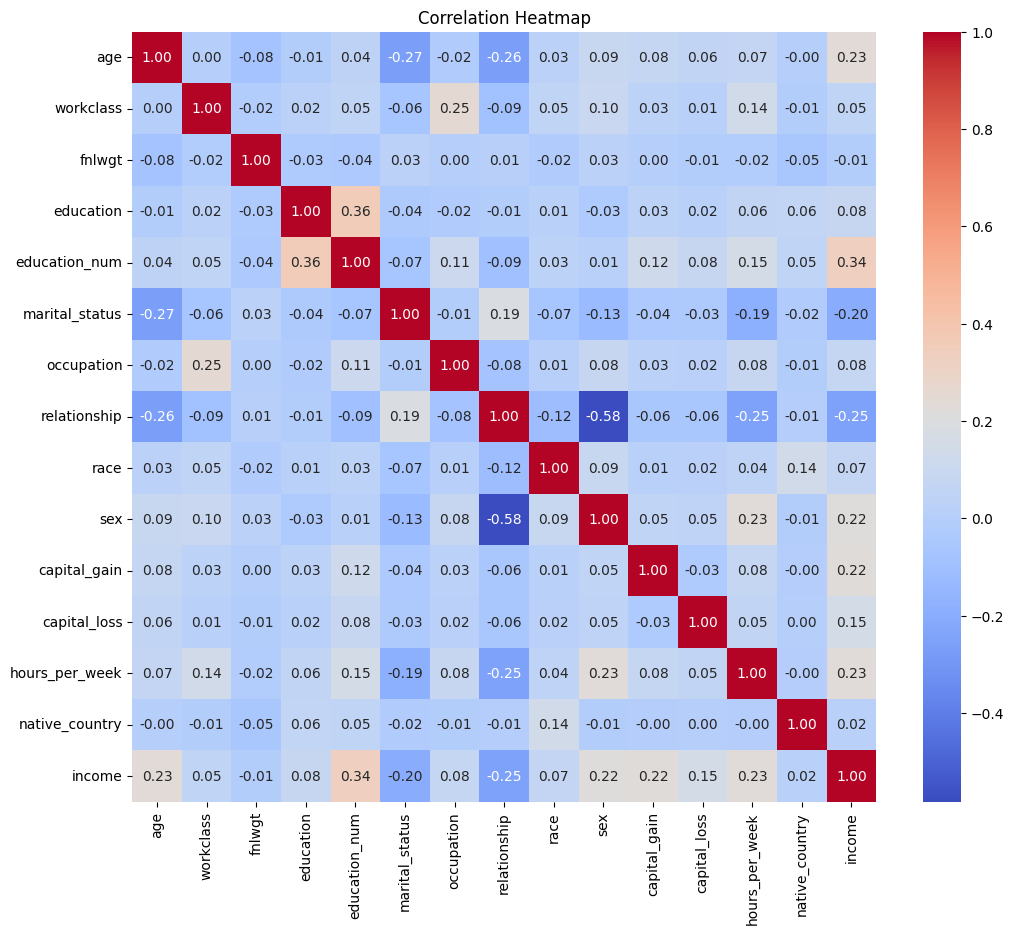

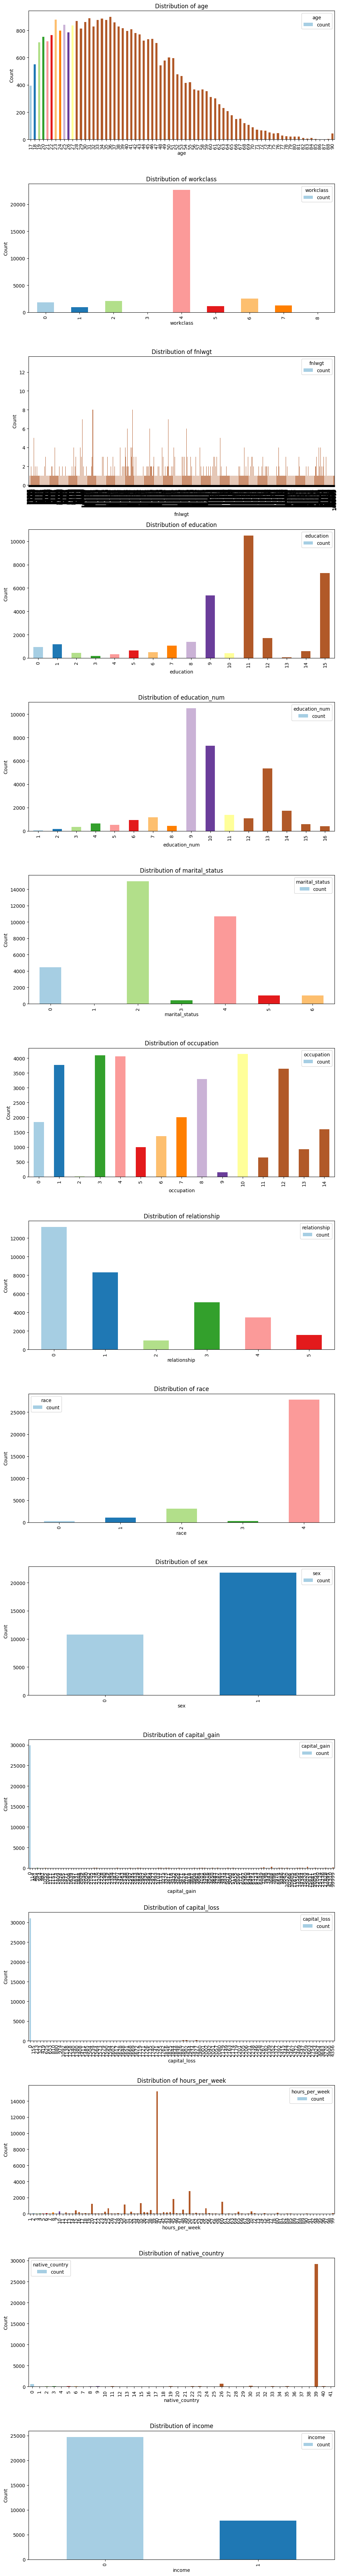

In [5]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#Chapiter 1 :  Data Exploration and Analysis


columns = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

df = pd.read_csv('/content/adult.data', header=None, names=columns)
df_encoded = pd.get_dummies(df)

print("Dataframe Head:")
print(tabulate(df.head(20), headers='keys', tablefmt='psql'))
print(tabulate(df.describe(), headers='keys', tablefmt='psql'))

categorical_columns = [
    "workclass", "education", "marital_status", "occupation",
    "relationship", "race", "sex", "native_country", "income"
]

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le



# Calculate the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap')
plt.show()


# Define a function to plot stacked bars
def plot_bar(df, cols):
    fig, axes = plt.subplots(len(cols), 1, figsize=(10, len(cols) * 5))

    for ax, col in zip(axes, cols):
        count_df = df[col].value_counts().sort_index()
        count_df.plot(kind='bar', stacked=True, ax=ax, color=plt.cm.Paired(range(len(count_df))))
        ax.set_ylabel('Count')
        ax.set_title(f'Distribution of {col}')
        ax.legend(title=col)

    plt.tight_layout()
    plt.show()

plot_bar(df, columns)

In [7]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from tabulate import tabulate

#Chapiter 2 : Extraction of the Association Rules

columns = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

df = pd.read_csv('/content/adult.data', header=None, names=columns)

df = df.dropna()


transactions = df.astype(str).values.tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)


frequent_itemsets = apriori(df_encoded, min_support=0.3, use_colnames=True)
print("Frequent Itemsets:")
print(tabulate(frequent_itemsets, headers='keys', tablefmt='psql'))

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)
print("\nAssociation Rules:")
print(tabulate(rules.head(15), headers='keys', tablefmt='psql'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequent Itemsets:
+-----+-----------+------------------------------------------------------------------------------------------+
|     |   support | itemsets                                                                                 |
|-----+-----------+------------------------------------------------------------------------------------------|
|   0 |  0.75919  | frozenset({' <=50K'})                                                                    |
|   1 |  0.330795 | frozenset({' Female'})                                                                   |
|   2 |  0.322502 | frozenset({' HS-grad'})                                                                  |
|   3 |  0.405178 | frozenset({' Husband'})                                                                  |
|   4 |  0.669205 | frozenset({' Male'})                                                                     |
|   5 |  0.459937 | frozenset({' Married-civ-spouse'})                                       

In [13]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from tabulate import tabulate

#Chapiter 2 : Extraction of the Association Rules

# Non-Redundant Association Rules
columns = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

df = pd.read_csv('/content/adult.data', header=None, names=columns)

# Drop rows with NaN values
df = df.dropna()

#df = df.drop_duplicates(inplace= True)

transactions = df.astype(str).values.tolist()

# Convert transactions to one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)


# Run the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.3, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)

non_redundant_rules = rules[rules.apply(lambda rule: not any(
    set(rule['antecedents']).issubset(set(other_rule['antecedents'])) and
    set(rule['consequents']).issubset(set(other_rule['consequents'])) and
    rule['lift'] < other_rule['lift']
    for _, other_rule in rules.iterrows()), axis=1)]


print("Frequent Itemsets:")
print(tabulate(frequent_itemsets, headers='keys', tablefmt='psql'))


print("\nNon-Redundant Association Rules (first 10):")
print(tabulate(non_redundant_rules.head(10), headers='keys', tablefmt='psql'))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequent Itemsets:
+-----+-----------+------------------------------------------------------------------------------------------+
|     |   support | itemsets                                                                                 |
|-----+-----------+------------------------------------------------------------------------------------------|
|   0 |  0.75919  | frozenset({' <=50K'})                                                                    |
|   1 |  0.330795 | frozenset({' Female'})                                                                   |
|   2 |  0.322502 | frozenset({' HS-grad'})                                                                  |
|   3 |  0.405178 | frozenset({' Husband'})                                                                  |
|   4 |  0.669205 | frozenset({' Male'})                                                                     |
|   5 |  0.459937 | frozenset({' Married-civ-spouse'})                                       

In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from tabulate import tabulate
from sklearn.cluster import AgglomerativeClustering, KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, confusion_matrix


#Chapiter 3 : Clustring Analysis and Comparison

columns = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]


df = pd.read_csv('/content/adult.data', header=None, names=columns)


categorical_columns = [
    "workclass", "education", "marital_status", "occupation",
    "relationship", "race", "sex", "native_country", "income"
]

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df = df.astype(np.double)

numerical_df = df.select_dtypes(include=[np.number])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)

# Hierarchical Agglomerative Clustering
Z = linkage(scaled_data, method='ward')


plt.figure(figsize=(18, 12))
plt.title("Dendrogram for Hierarchical Clustering", fontsize=20)
dendrogram(Z, leaf_rotation=90., leaf_font_size=12.)
plt.xlabel("Sample index", fontsize=15)
plt.ylabel("Distance", fontsize=15)
plt.show()

clusters = fcluster(Z, 5, criterion='maxclust')


#Evaluation
silhouette_score_hac = silhouette_score(scaled_data, clusters)

print("HAC Silhouette Score:", silhouette_score_hac)
conf_matrix_hac = confusion_matrix(df['income'], clusters)
print("HAC Confusion Matrix:")
print(conf_matrix_hac)

# Perform clustering
clusters = fcluster(Z, 5, criterion='maxclust')
print(clusters)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


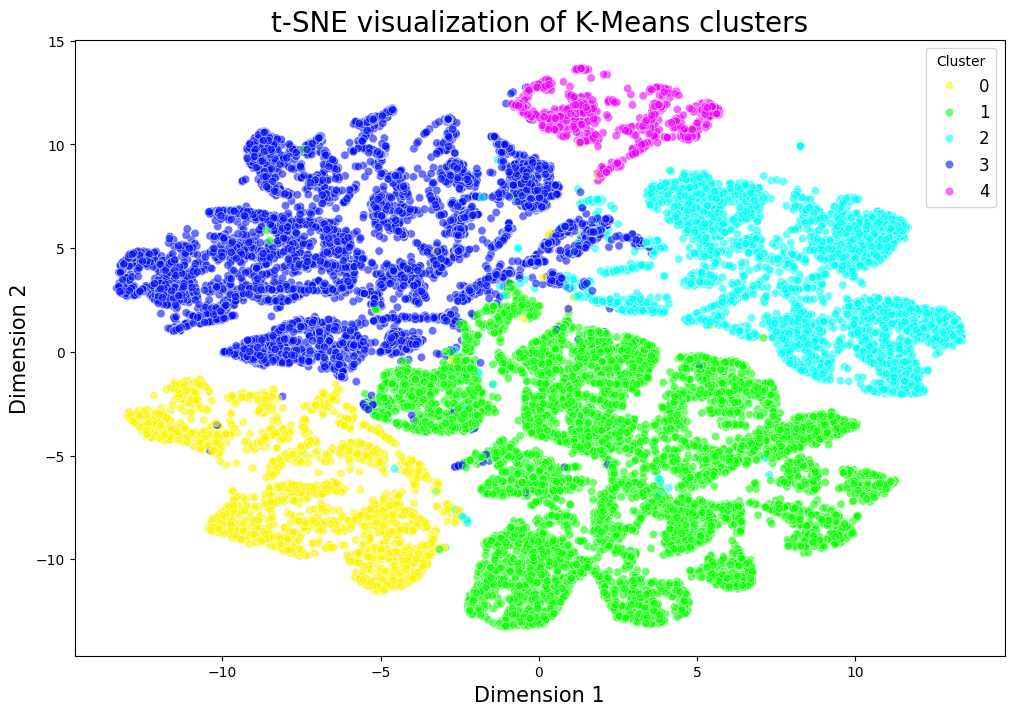

K-means Silhouette Score: 0.1352788146557835
K-means Confusion Matrix:
[[ 3918 11917    17  8167   701]
 [  183     1  6102   784   771]
 [    0     0     0     0     0]
 [    0     0     0     0     0]
 [    0     0     0     0     0]]


In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, confusion_matrix

#Chapiter 3 : Clustring Analysis and Comparison
#  K-means Algorithm

columns = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

df = pd.read_csv('/content/adult.data', header=None, names=columns)

categorical_columns = [
    "workclass", "education", "marital_status", "occupation",
    "relationship", "race", "sex", "native_country", "income"
]

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


df = df.astype(np.double)

numerical_df = df.select_dtypes(include=[np.number])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)


kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

tsne_df = pd.DataFrame(tsne_results, columns=['t-SNE 1', 't-SNE 2'])
tsne_df['Cluster'] = clusters


plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='t-SNE 1', y='t-SNE 2',
    hue='Cluster',
    palette=sns.color_palette("hsv", 5),
    data=tsne_df,
    legend="full",
    alpha=0.6)

plt.title('t-SNE visualization of K-Means clusters', fontsize=20)
plt.xlabel('Dimension 1', fontsize=15)
plt.ylabel('Dimension 2', fontsize=15)
plt.legend(title='Cluster', loc='best', fontsize='large')
plt.show()

# Evaluation
silhouette_score_kmeans = silhouette_score(scaled_data, clusters)

print("K-means Silhouette Score:", silhouette_score_kmeans)
conf_matrix_kmeans = confusion_matrix(df['income'], clusters)
print("K-means Confusion Matrix:")
print(conf_matrix_kmeans)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

#chapter 4 : knowledge Extraction with the Decision Tree

# Decision Tree
columns = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

df = pd.read_csv('/content/adult.data', header=None, names=columns)

categorical_columns = [
    "workclass", "education", "marital_status", "occupation",
    "relationship", "race", "sex", "native_country", "income"
]

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


df = df.astype(np.double)


X = df.drop("income", axis=1)
y = df["income"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

decision_tree = DecisionTreeClassifier(
    random_state=42,
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=5 )
decision_tree.fit(X_scaled, y)


tree_rules = export_text(decision_tree, feature_names=list(X.columns))
print(tree_rules)

plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=list(X.columns), class_names=True, filled=True)
plt.title('Decision Tree for Income Prediction')
plt.show()


# Evaluate the Decision Tree classifier
y_pred_dt = decision_tree.predict(X_scaled)
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y, y_pred_dt))
print("Classification Report:")
print(classification_report(y, y_pred_dt))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#chapter 4 : knowledge Extraction with the Decision Tree
# Random Forest classifier algorithm

columns = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]


df = pd.read_csv('/content/adult.data', header=None, names=columns)

categorical_columns = [
    "workclass", "education", "marital_status", "occupation",
    "relationship", "race", "sex", "native_country", "income"
]

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df = df.astype(np.double)

X = df.drop("income", axis=1)
y = df["income"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Predict the test set results
y_pred = random_forest.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))
